In [1]:
import torch 
torch.manual_seed(1)
import sys
sys.path.append('..')

from targets import Target
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

In [2]:
from models import MixedModelDensityEstimator
from models import DIFDensityEstimatorLayer
from models import RealNVPDensityEstimatorLayer

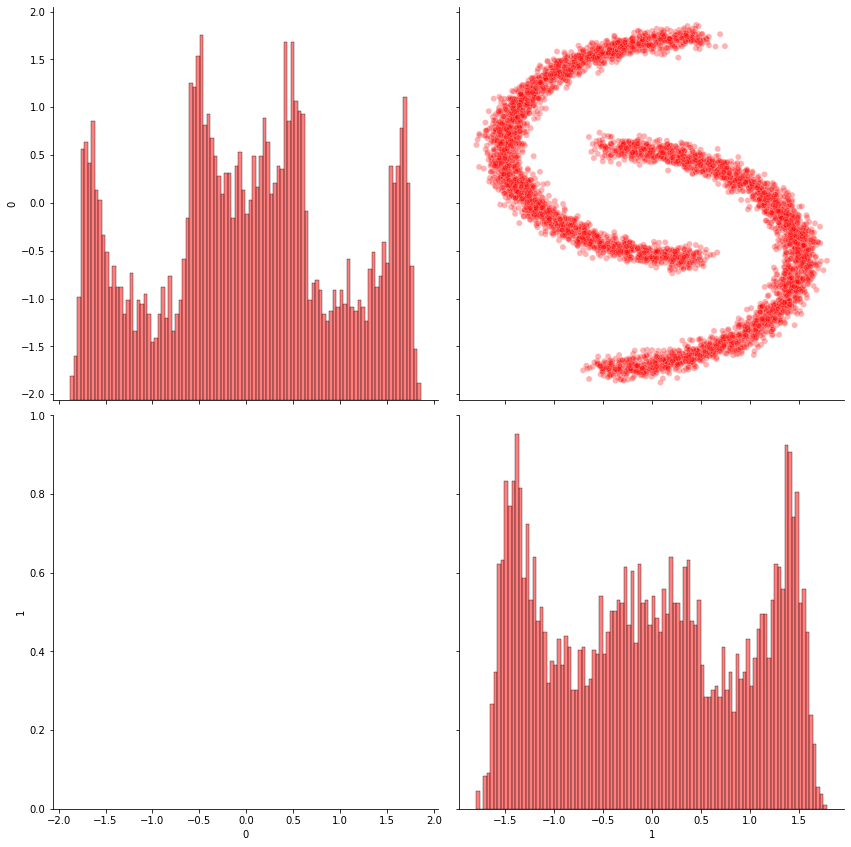

In [3]:
example =  "Moons"
num_samples = 50000
target =Target(example, num_samples)
target.target_visual()
p, target_log_density, target_samples = target.get_target()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [27:13<00:00,  1.22it/s, loss = 1.1437910795211792]
C:\Users\Elouan\PycharmProjects\Discretely-Indexed-Flows\venv\lib\site-packages\torch\functional.py:1069: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.cartesian_prod(tensors)  # type: ignore[attr-defined]


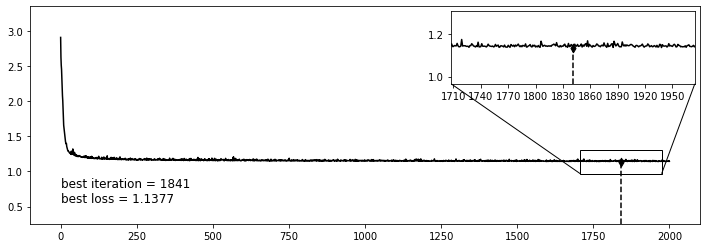

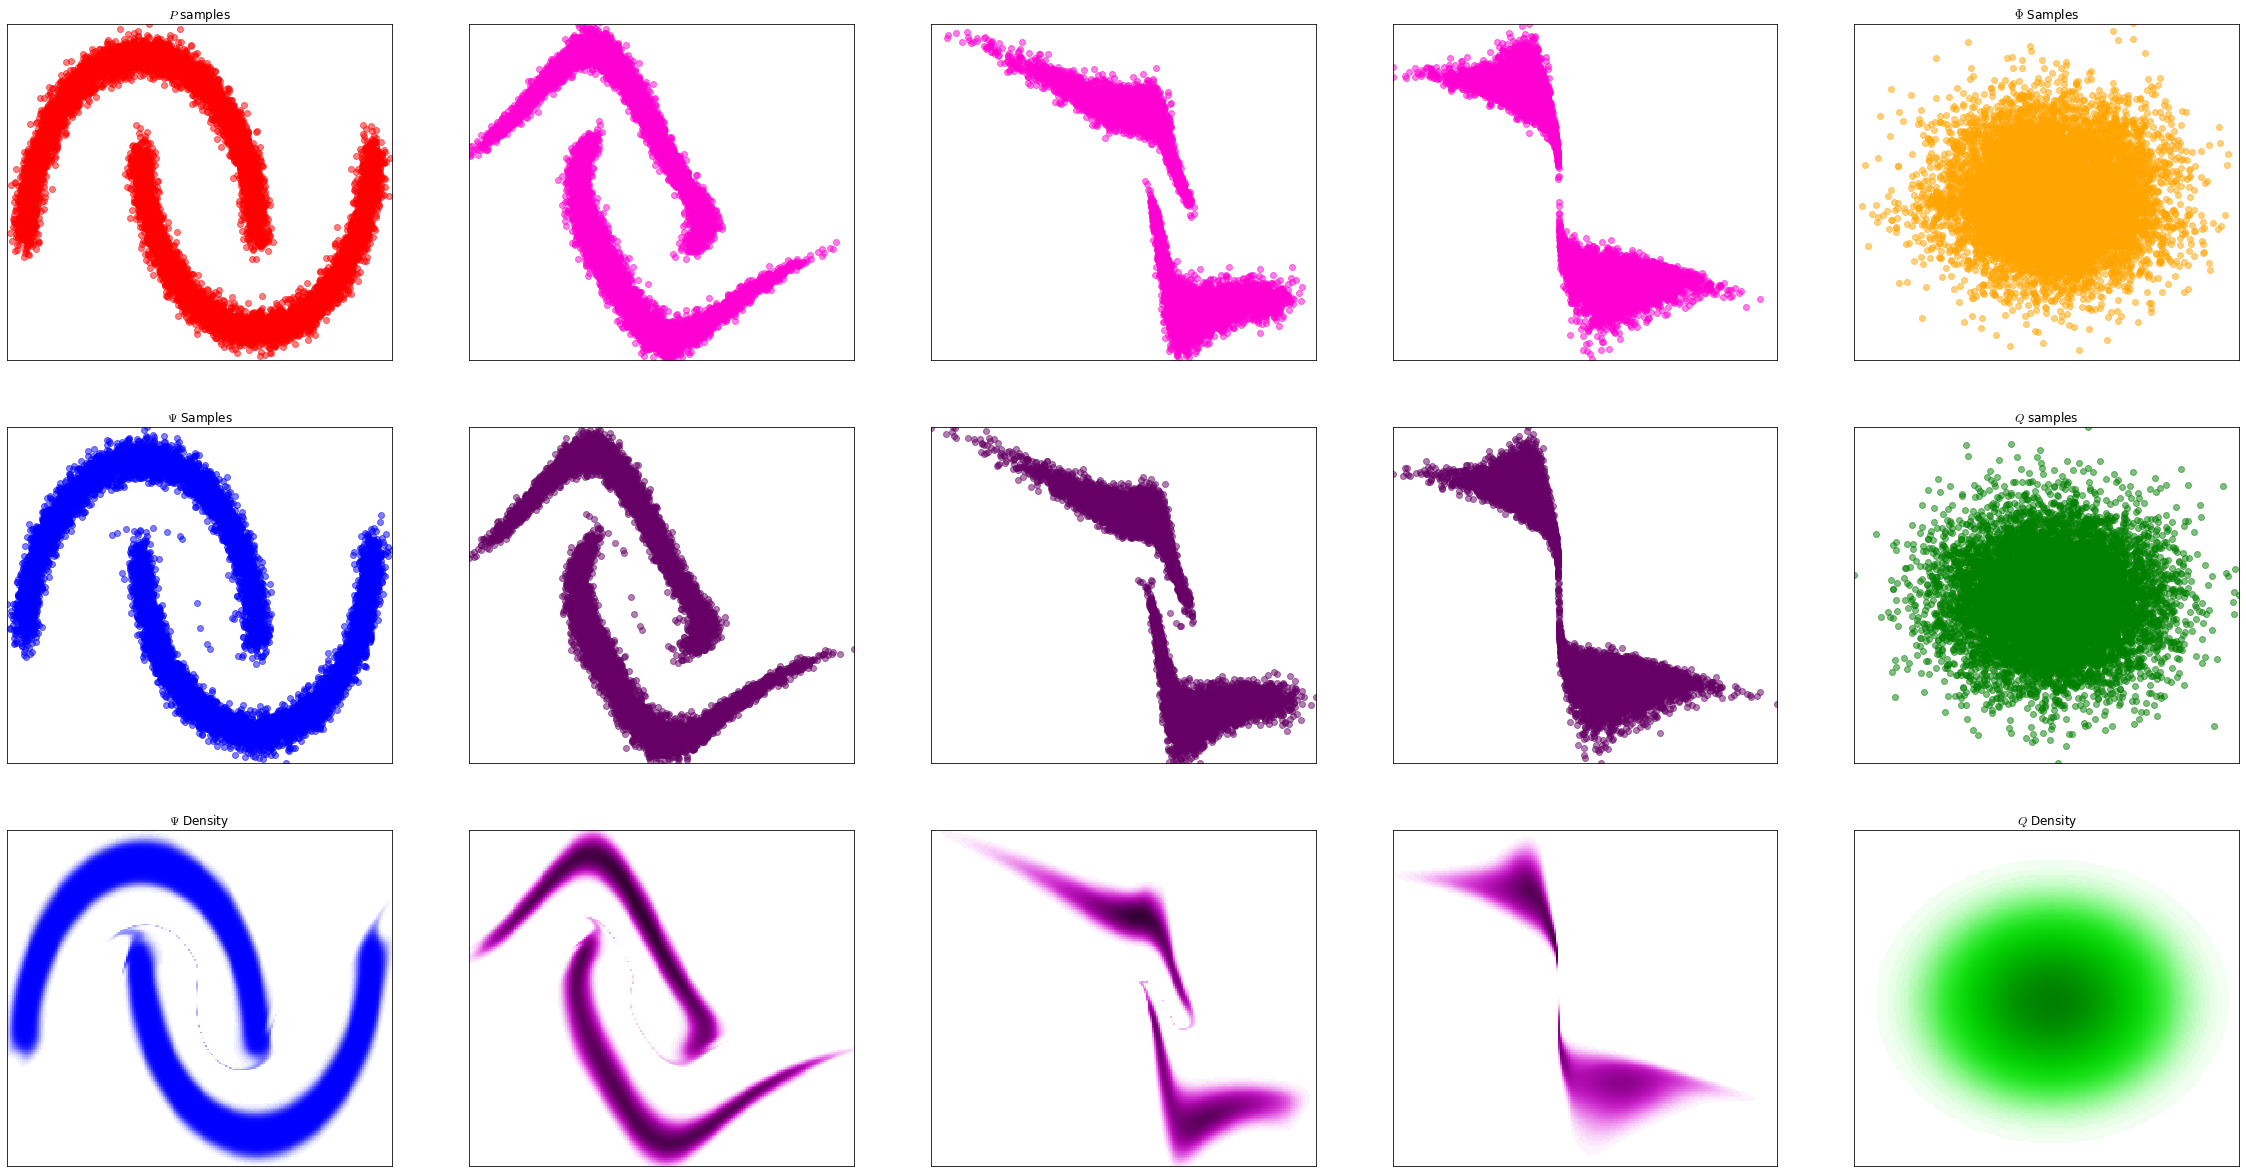

In [4]:
num_samples = target_samples.shape[0]
epochs =2000
batch_size = int(num_samples/50)
structure = [[RealNVPDensityEstimatorLayer,[180,180,180]],[RealNVPDensityEstimatorLayer,[180,180,180]],[RealNVPDensityEstimatorLayer,[180,180,180]],[RealNVPDensityEstimatorLayer,[180,180,180]]]
realnvp = MixedModelDensityEstimator(target_samples,structure)
realnvp.train(epochs, batch_size, visual = True)
realnvp.model_visual(num_samples=int(num_samples), flow = True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [3:34:08<00:00,  6.42s/it, loss = 1.1440823078155518]


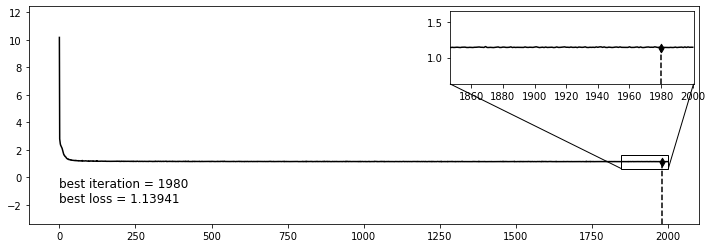

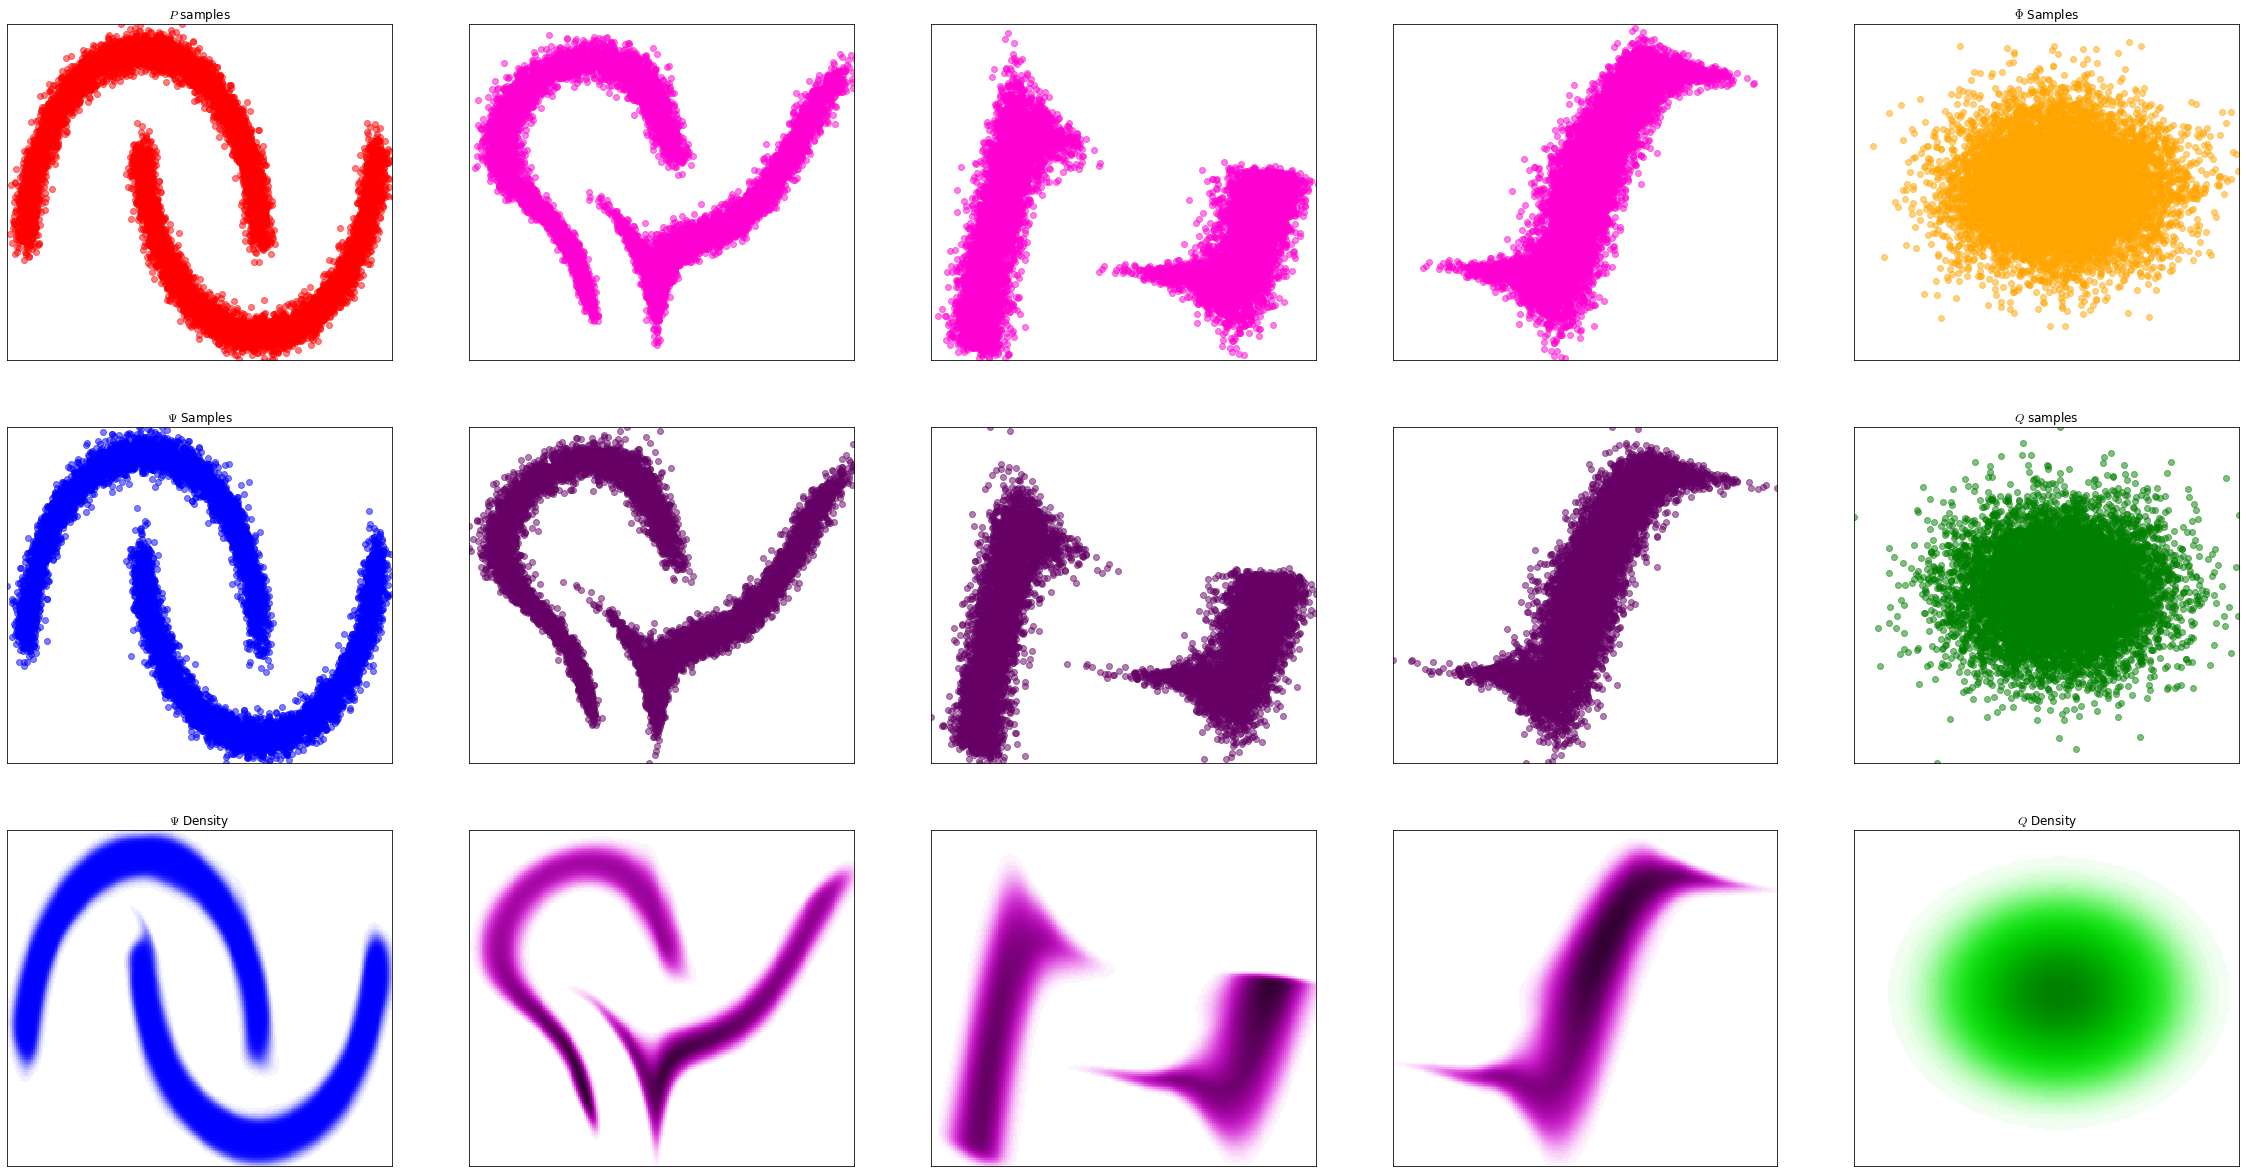

In [6]:
num_samples = target_samples.shape[0]
epochs =2000
batch_size = int(num_samples/50)
structure = [[RealNVPDensityEstimatorLayer,[180,180,180]],[RealNVPDensityEstimatorLayer,[180,180,180]],[DIFDensityEstimatorLayer, 2],[RealNVPDensityEstimatorLayer,[180,180,180]]]
realnvp = MixedModelDensityEstimator(target_samples,structure)
realnvp.train(epochs, batch_size, visual = True)
realnvp.model_visual(num_samples=int(num_samples/5), flow = True)